<a href="https://colab.research.google.com/github/bommojuvishu/stocksgraphcomp/blob/main/stock_graph_comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparing the stocks that are max linear graphs**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import numpy as np
import datetime as dt
import pandas as pd
import datetime
import os
import traceback
import matplotlib.pyplot as plt
import json
import logging 



In [ ]:
def min_max(data):
  max_x = max(data)
  min_x = min(data)
  result = []
  for x in data:
    x = x - min_x
    result.append(x/ (max_x - min_x))
    
  return result

def plotgraph(df , name):
  
  plt.figure(figsize=(9,4))
  plt.plot(df.index, df['minmax'])
  # best fit in orange
  plt.plot(df.index, df['expected'])
  plt.title(name)
  plt.show


def createList(df):
  # interval = 1/(len(df))
  # result =np.arange(0, 1, interval)

  # if len(result) != len(df):
  #   lastElementIndex = len(result)-1
  #   result = result[:lastElementIndex]

  # return result
  return np.linspace(0,1,len(df))

def computeCloud (data):
    if data.Close > data.MovingAVG:
        return 1
    
    return 0

def returnpercent(arr , nodays ):
  result ={}
  # TODAY = dt.datetime.today().strftime('%Y-%m-%d')
  datetime_object = dt.datetime.strptime(TODAY_rtrpercent, '%Y-%m-%d')
  for name in arr:
    ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(nodays),datetime_object)
    openprice = ohlcv.iloc[0]['Open']
    closeprice = ohlcv.iloc[len(ohlcv) -1 ]['Close']
    x = closeprice -openprice
    perrtr = (x/openprice) *100
    result[name] = perrtr
  print("Array :",result)

  return sum(result.values()) ,ohlcv

def graphfit(ohlcv):  
  x_data =x_values = np.linspace(0,1,len(ohlcv))

  y_data =ohlcv['Close'].to_numpy()

  ylog_data = np.log(y_data)

  curve_fit = np.polyfit(x_data, ylog_data, 1)
  a , b  =curve_fit

  y = np.exp(b) * np.exp(a*x_data)
  scaled_y =  min_max(y)
  return scaled_y
  # plt.plot(x_data, y_data)

  # # best fit in orange
  # plt.plot(x_data, y)

def returnpercent_v2(arr , movingavg , nodays ):
  result ={}
  print(arr)
  # TODAY = dt.datetime.today().strftime('%Y-%m-%d')
  datetime_object = dt.datetime.strptime(TODAY_rtrpercent, '%Y-%m-%d')

  slicedate = datetime_object -dt.timedelta(nodays)

  for name in arr:
    gotclose =False
    ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(365),datetime_object)
    ohlcv['movingavg'] = ohlcv['Close'].rolling(window= movingavg).mean()
    ohlcv = ohlcv.loc[slicedate :]
    print(name)
    openprice = ohlcv.iloc[0]['Open']
    # if open price < less than moving avg then score 0
    if openprice < ohlcv.iloc[0]['movingavg']:
      print("less than moving avg")
      result[name] = 0
      continue

    # Get close price
    for index, row in ohlcv.iterrows():
      if row['Close'] < row['movingavg']:
        closeprice= row['Close']
        gotclose =True
        break
    if gotclose:
      print("")
    else:
      closeprice = ohlcv.iloc[len(ohlcv) -1 ]['Close']
    # print(openprice, closeprice)
    #Final cal
    x = closeprice -openprice
    perrtr = (x/openprice) *100
    result[name] = perrtr
  print("Array:",result)
  return sum(result.values()) ,ohlcv

In [ ]:
#nifty 50
liststocks =["HINDALCO","JSWSTEEL","CIPLA","INFY","TATASTEEL","NESTLEIND","APOLLOHOSP","DRREDDY","DIVISLAB","WIPRO","ULTRACEMCO","SUNPHARMA","ASIANPAINT","HCLTECH","TECHM","ADANIPORTS","LT","UPL","ITC","BAJFINANCE","TCS","HDFCBANK","ONGC","TATAMOTORS","GRASIM","HEROMOTOCO","EICHERMOT","BAJAJFINSV","BPCL","HINDUNILVR","INDUSINDBK","HDFCLIFE","AXISBANK","M&M","HDFC","ICICIBANK","BAJAJ-AUTO","BRITANNIA","SHREECEM","TITAN","POWERGRID","SBILIFE","KOTAKBANK","BHARTIARTL","MARUTI","RELIANCE","SBIN","COALINDIA","NTPC","TATACONSUM"]

In [ ]:
#nifty 500
liststocks = ["3MINDIA","ABB","ACC","AIAENG","APLAPOLLO","AUBANK","AARTIDRUGS","AARTIIND","AAVAS","ABBOTINDIA","ADANIENT","ADANIGREEN","ADANIPORTS","ATGL","ADANITRANS","ABCAPITAL","ABFRL","ADVENZYMES","AEGISCHEM","AFFLE","AJANTPHARM","ALEMBICLTD","APLLTD","ALKEM","ALKYLAMINE","ALOKINDS","AMARAJABAT","AMBER","AMBUJACEM","ANGELONE","ANURAS","APOLLOHOSP","APOLLOTYRE","ASAHIINDIA","ASHOKLEY","ASHOKA","ASIANPAINT","ASTERDM","ASTRAZEN","ASTRAL","ATUL","AUROPHARMA","AVANTIFEED","DMART","AXISBANK","BASF","BEML","BSE","BAJAJ-AUTO","BAJAJCON","BAJAJELEC","BAJFINANCE","BAJAJFINSV","BAJAJHLDNG","BALAMINES","BALKRISIND","BALRAMCHIN","BANDHANBNK","BANKBARODA","BANKINDIA","MAHABANK","BATAINDIA","BAYERCROP","BERGEPAINT","BDL","BEL","BHARATFORG","BHEL","BPCL","BHARATRAS","BHARTIARTL","BIOCON","BIRLACORPN","BSOFT","BLUEDART","BLUESTARCO","BBTC","BOSCHLTD","BRIGADE","BRITANNIA","CCL","CESC","CGPOWER","CRISIL","CSBBANK","CADILAHC","CANFINHOME","CANBK","CAPLIPOINT","CGCL","CARBORUNIV","CASTROLIND","CEATLTD","CENTRALBK","CDSL","CENTURYPLY","CENTURYTEX","CERA","CHALET","CHAMBLFERT","CHOLAHLDNG","CHOLAFIN","CIPLA","CUB","COALINDIA","COCHINSHIP","COFORGE","COLPAL","CAMS","CONCOR","COROMANDEL","CREDITACC","CROMPTON","CUMMINSIND","CYIENT","DCBBANK","DCMSHRIRAM","DLF","DABUR","DALBHARAT","DEEPAKNTR","DELTACORP","DHANI","DHANUKA","DBL","DIVISLAB","DIXON","LALPATHLAB","DRREDDY","EIDPARRY","EIHOTEL","EPL","EDELWEISS","EICHERMOT","ELGIEQUIP","EMAMILTD","ENDURANCE","ENGINERSIN","EQUITAS","EQUITASBNK","ERIS","ESCORTS","EXIDEIND","FDC","FEDERALBNK","FACT","FINEORG","FINCABLES","FINPIPE","FSL","FORTIS","FRETAIL","GAIL","GMMPFAUDLR","GALAXYSURF","GARFIBRES","GICRE","GILLETTE","GLAND","GLAXO","GLENMARK","GODFRYPHLP","GODREJAGRO","GODREJCP","GODREJIND","GODREJPROP","GRANULES","GRAPHITE","GRASIM","GESHIP","GREAVESCOT","GRINDWELL","GUJALKALI","GAEL","FLUOROCHEM","GUJGASLTD","GNFC","GPPL","GSFC","GSPL","HEG","HCLTECH","HDFCAMC","HDFCBANK","HDFCLIFE","HFCL","HAPPSTMNDS","HATHWAY","HATSUN","HAVELLS","HEIDELBERG","HEMIPROP","HEROMOTOCO","HIKAL","HINDALCO","HGS","HAL","HINDCOPPER","HINDPETRO","HINDUNILVR","HINDZINC","POWERINDIA","HOMEFIRST","HONAUT","HUDCO","HDFC","ICICIBANK","ICICIGI","ICICIPRULI","ISEC","IDBI","IDFCFIRSTB","IDFC","IFBIND","IIFL","IIFLWAM","IOLCP","IRB","IRCON","ITC","ITI","INDIACEM","IBULHSGFIN","IBREALEST","INDIAMART","INDIANB","IEX","INDHOTEL","IOC","IOB","IRCTC","IRFC","INDIGOPNTS","ICIL","INDOCO","IGL","INDUSTOWER","INDUSINDBK","INFIBEAM","NAUKRI","INFY","INGERRAND","INOXLEISUR","INTELLECT","INDIGO","IPCALAB","JBCHEPHARM","JKCEMENT","JKLAKSHMI","JKPAPER","JKTYRE","JMFINANCIL","JSWENERGY","JSWSTEEL","JAMNAAUTO","JINDALSAW","JSLHISAR","JSL","JINDALSTEL","JCHAC","JUBLFOOD","JUBLINGREA","JUBLPHARMA","JUSTDIAL","JYOTHYLAB","KPRMILL","KEI","KNRCON","KPITTECH","KRBL","KSB","KAJARIACER","KALPATPOWR","KALYANKJIL","KANSAINER","KARURVYSYA","KSCL","KEC","KOTAKBANK","L&TFH","LTTS","LICHSGFIN","LAOPALA","LAXMIMACH","LTI","LT","LAURUSLABS","LXCHEM","LEMONTREE","LINDEINDIA","LUPIN","LUXIND","MMTC","MOIL","MRF","LODHA","MGL","M&MFIN","M&M","MAHINDCIE","MHRIL","MAHLOG","MANAPPURAM","MRPL","MARICO","MARUTI","MASTEK","MFSL","MAXHEALTH","MAZDOCK","METROPOLIS","MINDTREE","MINDACORP","MINDAIND","MIDHANI","MOTILALOFS","MPHASIS","MCX","MUTHOOTFIN","NATCOPHARM","NBCC","NCC","NESCO","NHPC","NLCINDIA","NMDC","NOCIL","NTPC","NH","NATIONALUM","NFL","NAVINFLUOR","NAZARA","NESTLEIND","NETWORK18","NILKAMAL","NAM-INDIA","OBEROIRLTY","ONGC","OIL","OFSS","ORIENTELEC","PCBL","PIIND","PNBHOUSING","PNCINFRA","PVR","PAGEIND","PERSISTENT","PETRONET","PFIZER","PHOENIXLTD","PIDILITIND","PEL","POLYMED","POLYCAB","POLYPLEX","POONAWALLA","PFC","POWERGRID","PRAJIND","PRESTIGE","PRINCEPIPE","PRSMJOHNSN","PGHL","PGHH","PNB","QUESS","RBLBANK","RECLTD","RHIM","RITES","RADICO","RVNL","RAILTEL","RAIN","RAJESHEXPO","RALLIS","RCF","RATNAMANI","REDINGTON","RELAXO","RELIANCE","RBA","ROSSARI","ROUTE","SBICARD","SBILIFE","SIS","SJVN","SKFINDIA","SRF","SANOFI","SCHAEFFLER","SCHNEIDER","SEQUENT","SHARDACROP","SFL","SHILPAMED","SCI","SHREECEM","SHRIRAMCIT","SRTRANSFIN","SIEMENS","SOBHA","SOLARINDS","SOLARA","SONACOMS","SONATSOFTW","SPANDANA","SPICEJET","STARCEMENT","SBIN","SAIL","SWSOLAR","STLTECH","STAR","SUDARSCHEM","SUMICHEM","SPARC","SUNPHARMA","SUNTV","SUNDARMFIN","SUNDRMFAST","SUNTECK","SUPRAJIT","SUPREMEIND","SUPPETRO","SUVENPHAR","SUZLON","SYMPHONY","SYNGENE","TCIEXP","TCNSBRANDS","TTKPRESTIG","TV18BRDCST","TVSMOTOR","TANLA","TASTYBITE","TATACHEM","TATACOFFEE","TATACOMM","TCS","TATACONSUM","TATAELXSI","TATAMTRDVR","TATAMOTORS","TATAPOWER","TATASTLLP","TATASTEEL","TTML","TEAMLEASE","TECHM","NIACL","RAMCOCEM","THERMAX","THYROCARE","TIMKEN","TITAN","TORNTPHARM","TORNTPOWER","TRENT","TRIDENT","TRITURBINE","TIINDIA","UCOBANK","UFLEX","UPL","UTIAMC","UJJIVAN","UJJIVANSFB","ULTRACEMCO","UNIONBANK","UBL","MCDOWELL-N","VGUARD","VMART","VIPIND","VAIBHAVGBL","VAKRANGEE","VALIANTORG","VTL","VARROC","VBL","VEDL","VENKEYS","VINATIORGA","IDEA","VOLTAS","WABCOINDIA","WELCORP","WELSPUNIND","WESTLIFE","WHIRLPOOL","WIPRO","WOCKPHARMA","YESBANK","ZEEL","ZENSARTECH","ZYDUSWELL","ECLERX"]

In [ ]:
# liststocks = ['PERSISTENT','INFY','M&M','VBL']
tickers={}

daterange = 30
TODAY_rtrpercent = "2022-09-01"
periodinput = 90
TODAY = "2022-08-01"
TODAY = dt.datetime.today().strftime('%Y-%m-%d')
datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')

count=0
for name in liststocks: 
    try:
        finalresult = []
        count = count +1
        i=0
        flag =False
        print(count,name)
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
    
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        print("LENGTH:",len(ohlcv))
        ohlcv['expected'] = graphfit(ohlcv)
        # ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) if x['expected'] > x['minmax']  else 0 , axis=1)
        ohlcv['result'] = ohlcv.apply(lambda x: (x['expected'] - x['minmax']) , axis=1)
        ohlcv['result'] = ohlcv['result'].abs()

        if ohlcv['expected'].values[0] == 1:
          flag=True

        finalresult.append(sum(ohlcv['result']))
   
        if flag:
          tickers[name] = [100000]
        else:
          tickers[name] = finalresult
    
    except Exception as ex:
        print(ex)#raised if `y` is empty.
        print("ERROR: ", name)
        liststocks.remove(name)
        traceback.print_exc()
        

df=pd.DataFrame.from_dict(tickers,orient='index')
df = df.reset_index()
df

1 3MINDIA
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
2 ABB
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
3 ACC
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
4 AIAENG
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
5 APLAPOLLO
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
6 AUBANK
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
7 AARTIDRUGS
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
8 AARTIIND
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
9 AAVAS
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
10 ABBOTINDIA
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
11 ADANIENT
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
12 ADANIGR

Traceback (most recent call last):
  File "<ipython-input-55-cd12dc19c924>", line 21, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-52-c77787b8deab>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


88 CAPLIPOINT
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
89 CGCL
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
90 CARBORUNIV
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
91 CASTROLIND
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
92 CEATLTD
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
93 CENTRALBK
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
94 CDSL
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
95 CENTURYPLY
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
96 CENTURYTEX
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
97 CERA
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
98 CHALET
[*********************100%***********************]  1 of 1 completed
LEN

Traceback (most recent call last):
  File "<ipython-input-55-cd12dc19c924>", line 21, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-52-c77787b8deab>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


[*********************100%***********************]  1 of 1 completed
LENGTH: 61
430 SYNGENE
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
431 TCIEXP
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
432 TCNSBRANDS
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
433 TTKPRESTIG
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
434 TV18BRDCST
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
435 TVSMOTOR
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
436 TANLA
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
437 TASTYBITE
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
438 TATACHEM
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
439 TATACOFFEE
[*********************100%***********************]  1 of 1 complete

Traceback (most recent call last):
  File "<ipython-input-55-cd12dc19c924>", line 21, in <module>
    ohlcv['minmax']=min_max(ohlcv['Close'].values)
  File "<ipython-input-52-c77787b8deab>", line 2, in min_max
    max_x = max(data)
ValueError: max() arg is an empty sequence


[*********************100%***********************]  1 of 1 completed
LENGTH: 61
491 WHIRLPOOL
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
492 WIPRO
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
493 WOCKPHARMA
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
494 YESBANK
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
495 ZEEL
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
496 ZENSARTECH
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
497 ZYDUSWELL
[*********************100%***********************]  1 of 1 completed
LENGTH: 61
498 ECLERX
[*********************100%***********************]  1 of 1 completed
LENGTH: 61


,index,0
0,3MINDIA,12.448644
1,ABB,6.866400
2,ACC,5.858035
3,AIAENG,4.665032
4,APLAPOLLO,11.447516
...,...,...
490,YESBANK,7.579672
491,ZEEL,7.258100
492,ZENSARTECH,100000.000000
493,ZYDUSWELL,13.922645


In [ ]:
df.sort_values(by=[0])

,index,0
388,SKFINDIA,2.829711
14,ADANITRANS,3.424575
381,RBA,3.684170
432,TVSMOTOR,3.727980
281,LAXMIMACH,3.783116
...,...,...
189,HEMIPROP,100000.000000
156,GLAND,100000.000000
274,KSCL,100000.000000
150,GAIL,NaN


topnames ['SKFINDIA' 'ADANITRANS' 'RBA' 'TVSMOTOR' 'LAXMIMACH' 'PIDILITIND' 'IDFC'
 'CCL' 'UJJIVAN' 'WESTLIFE' 'GRASIM' 'LT' 'EICHERMOT' 'RECLTD'
 'PHOENIXLTD' 'BANKBARODA' 'CUB' 'FEDERALBNK' 'ITC' 'JYOTHYLAB' 'ATGL'
 'ICICIBANK' 'TRENT' 'AIAENG' 'LAOPALA' 'PRSMJOHNSN' 'ABFRL' 'ADANIGREEN'
 'PIIND' 'GALAXYSURF' 'PAGEIND' 'HONAUT' 'LICHSGFIN' 'HGS' 'HAVELLS'
 'FINCABLES' 'TITAN' 'RAMCOCEM' 'GESHIP' 'MINDAIND' 'GRINDWELL' 'INDHOTEL'
 'ASIANPAINT' 'JKCEMENT' 'IDFCFIRSTB' 'SHREECEM' 'M&M' 'POONAWALLA'
 'TORNTPOWER' 'RADICO' 'FORTIS' 'OBEROIRLTY' 'DLF' 'PNB' 'APOLLOTYRE'
 'DMART' 'JINDALSTEL' 'ACC' 'VTL' 'EXIDEIND' 'IFBIND' 'COALINDIA' 'BASF'
 'ADANIPORTS' 'ADANIENT' 'BHEL' 'HDFCBANK' 'HDFC' 'BAJAJFINSV' 'TIMKEN'
 'JKTYRE' 'INDIACEM' 'NESTLEIND' 'INDIANB' 'AARTIIND' 'DIXON' 'AXISBANK'
 'SAIL' 'TATACOMM' 'CENTURYPLY' 'MRF' 'APOLLOHOSP' 'UJJIVANSFB'
 'INGERRAND' 'SCHAEFFLER' 'HEG' 'SIEMENS' 'JKLAKSHMI' 'TORNTPHARM'
 'COROMANDEL' 'TTKPRESTIG' 'ABB' 'EQUITASBNK' 'RALLIS' 'ABCAPITAL'
 'JBCHEPHAR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
TRENT
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


AIAENG
[*********************100%***********************]  1 of 1 completed
LAOPALA
[*********************100%***********************]  1 of 1 completed
PRSMJOHNSN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
ABFRL
[*********************100%***********************]  1 of 1 completed
ADANIGREEN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
PIIND


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
GALAXYSURF
[*********************100%***********************]  1 of 1 completed
PAGEIND


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
HONAUT
[*********************100%***********************]  1 of 1 completed
LICHSGFIN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
HGS
[*********************100%***********************]  1 of 1 completed
HAVELLS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
FINCABLES
[*********************100%***********************]  1 of 1 completed
TITAN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
RAMCOCEM
[*********************100%***********************]  1 of 1 completed
GESHIP


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
MINDAIND
[*********************100%***********************]  1 of 1 completed
GRINDWELL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
INDHOTEL
[*********************100%***********************]  1 of 1 completed
ASIANPAINT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
JKCEMENT
[*********************100%***********************]  1 of 1 completed
IDFCFIRSTB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
SHREECEM
[*********************100%***********************]  1 of 1 completed
M&M


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
POONAWALLA
[*********************100%***********************]  1 of 1 completed
TORNTPOWER


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
RADICO
[*********************100%***********************]  1 of 1 completed
FORTIS


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
OBEROIRLTY
[*********************100%***********************]  1 of 1 completed
DLF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
PNB
[*********************100%***********************]  1 of 1 completed
APOLLOTYRE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
DMART
[*********************100%***********************]  1 of 1 completed
JINDALSTEL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
ACC
[*********************100%***********************]  1 of 1 completed
VTL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
EXIDEIND
[*********************100%***********************]  1 of 1 completed
IFBIND


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
COALINDIA
[*********************100%***********************]  1 of 1 completed
BASF


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
ADANIPORTS
[*********************100%***********************]  1 of 1 completed
ADANIENT


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
BHEL
[*********************100%***********************]  1 of 1 completed
HDFCBANK


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
HDFC
[*********************100%***********************]  1 of 1 completed
BAJAJFINSV


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
TIMKEN
[*********************100%***********************]  1 of 1 completed
JKTYRE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
INDIACEM
[*********************100%***********************]  1 of 1 completed
NESTLEIND


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
INDIANB
[*********************100%***********************]  1 of 1 completed
AARTIIND


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
DIXON
[*********************100%***********************]  1 of 1 completed
AXISBANK


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
SAIL
[*********************100%***********************]  1 of 1 completed
TATACOMM


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
CENTURYPLY


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
MRF
[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


APOLLOHOSP
[*********************100%***********************]  1 of 1 completed
UJJIVANSFB
[*********************100%***********************]  1 of 1 completed
INGERRAND


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
SCHAEFFLER
[*********************100%***********************]  1 of 1 completed
HEG


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
SIEMENS
[*********************100%***********************]  1 of 1 completed
JKLAKSHMI


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
TORNTPHARM


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
COROMANDEL
[*********************100%***********************]  1 of 1 completed
TTKPRESTIG


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
ABB
[*********************100%***********************]  1 of 1 completed
EQUITASBNK


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
RALLIS
[*********************100%***********************]  1 of 1 completed
ABCAPITAL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
JBCHEPHARM


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
NAUKRI
[*********************100%***********************]  1 of 1 completed
TATACOFFEE


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


[*********************100%***********************]  1 of 1 completed
KRBL


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


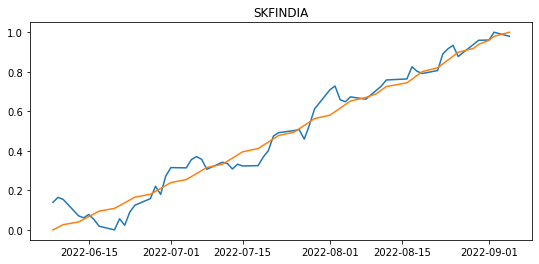

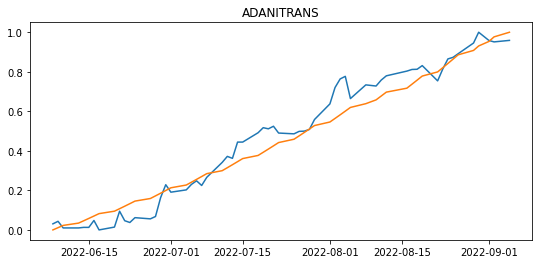

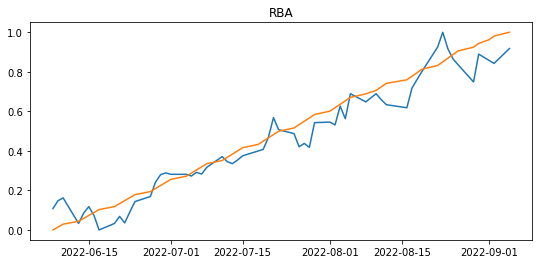

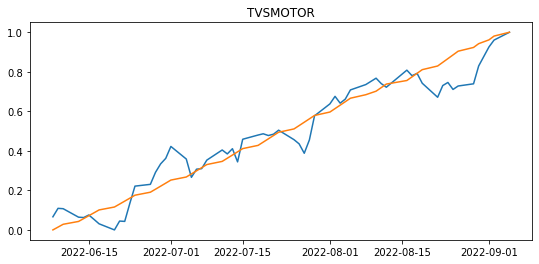

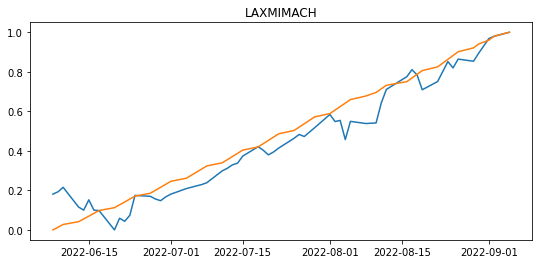

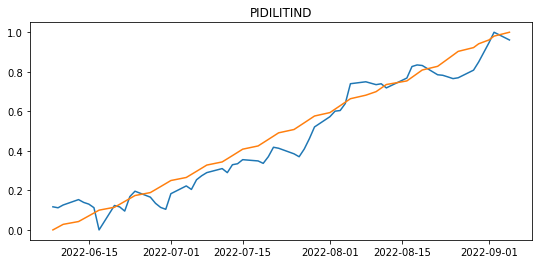

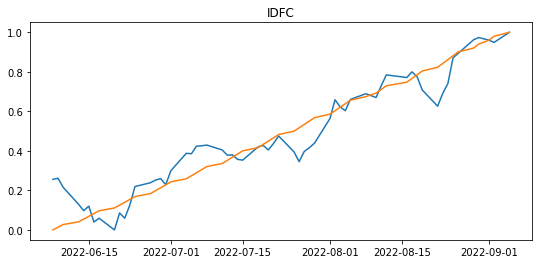

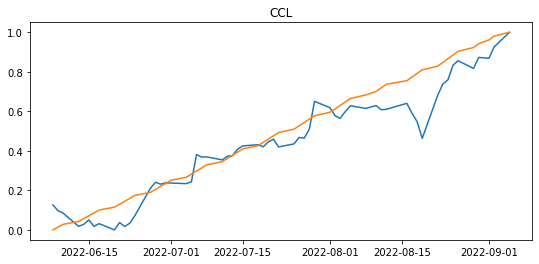

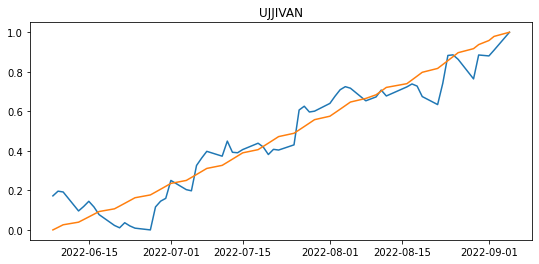

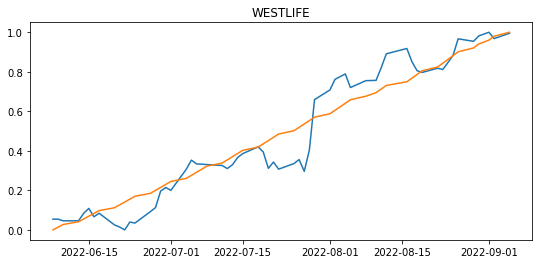

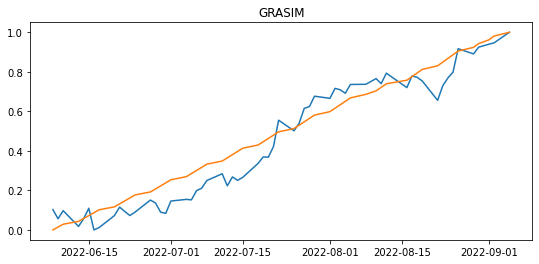

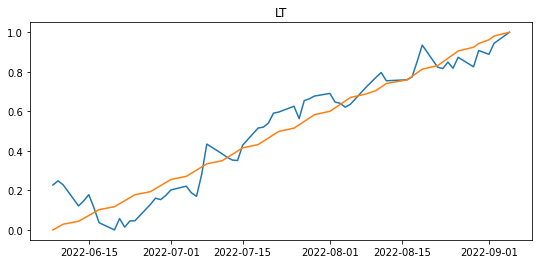

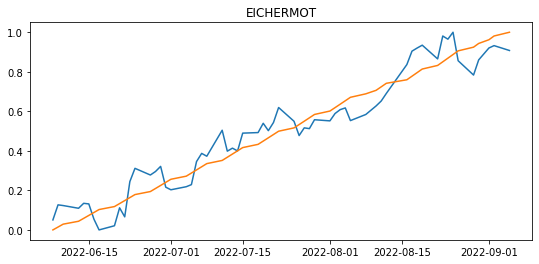

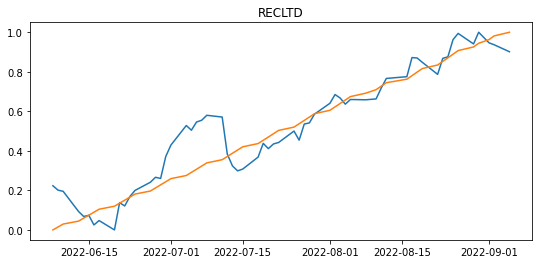

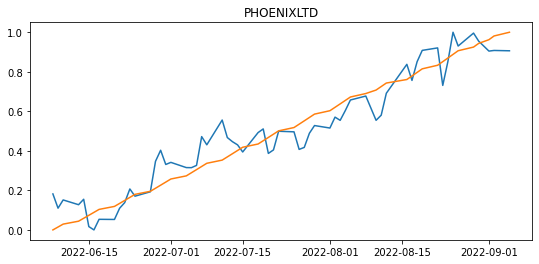

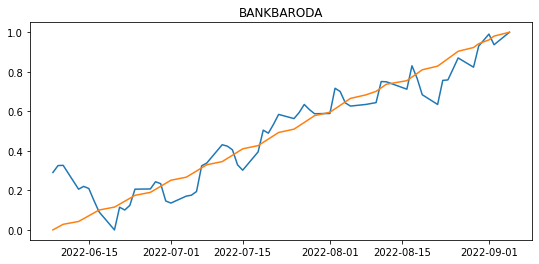

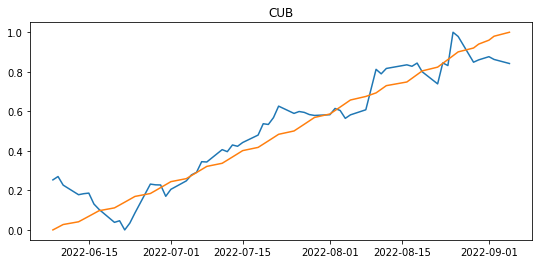

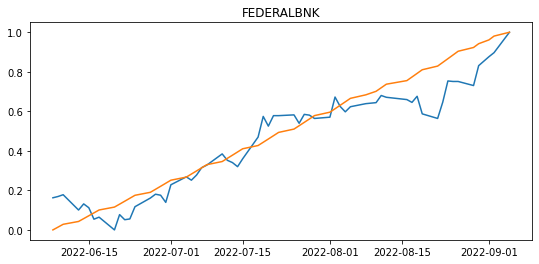

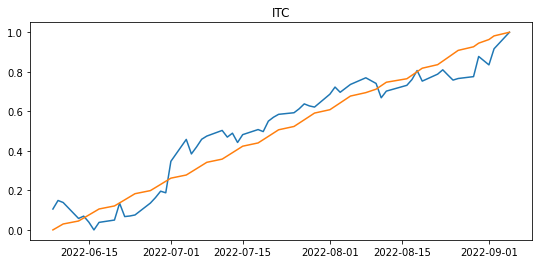

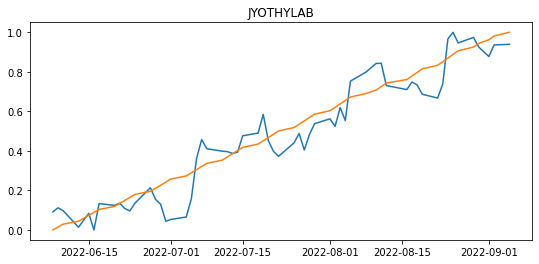

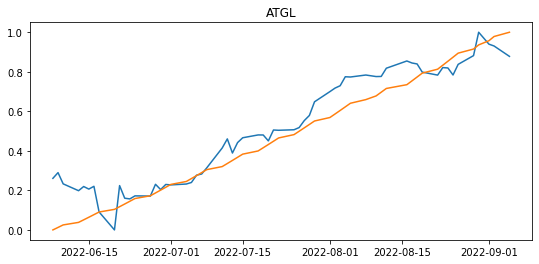

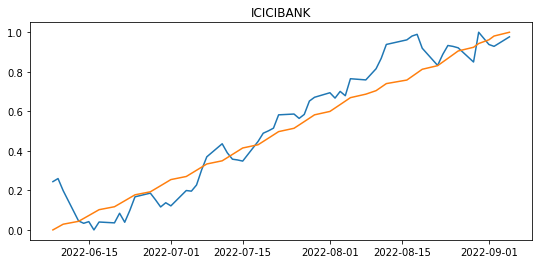

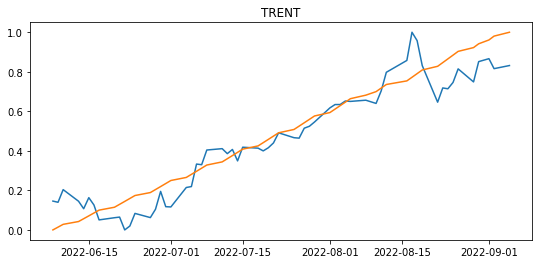

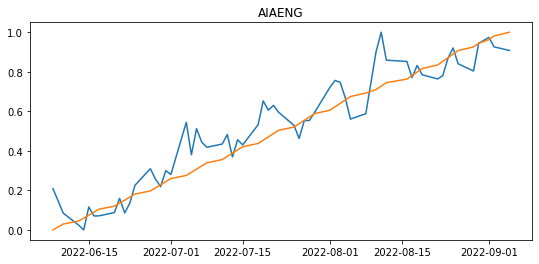

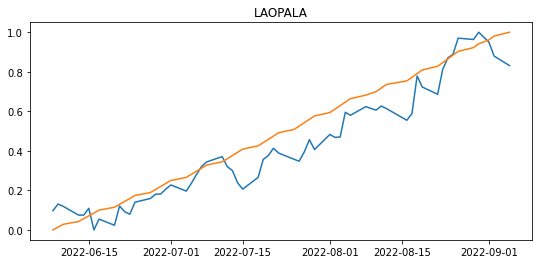

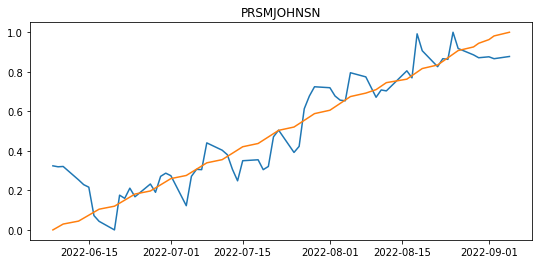

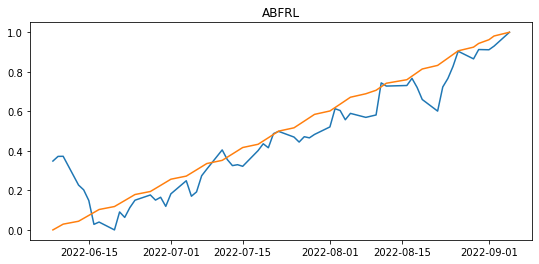

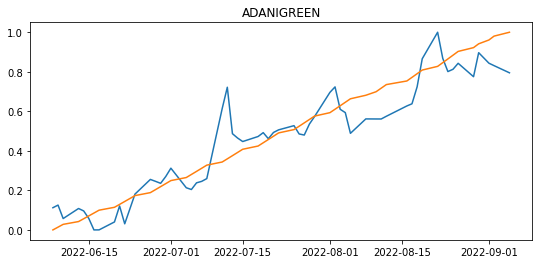

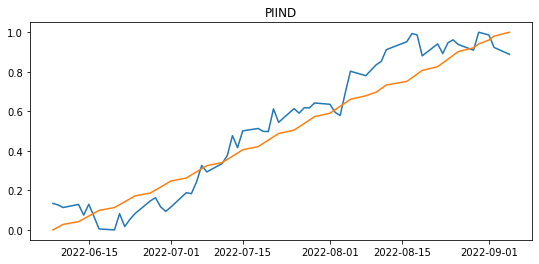

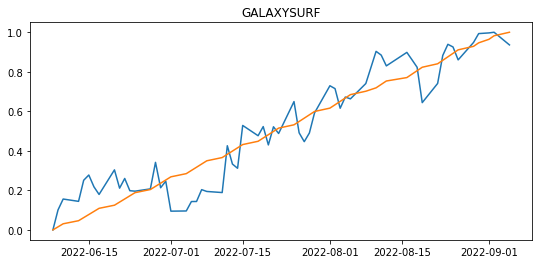

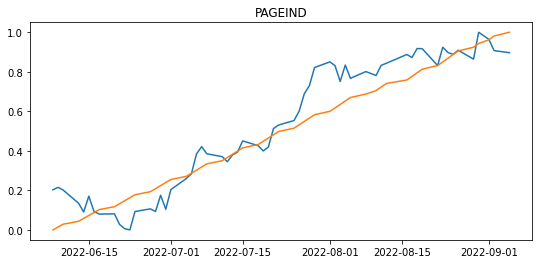

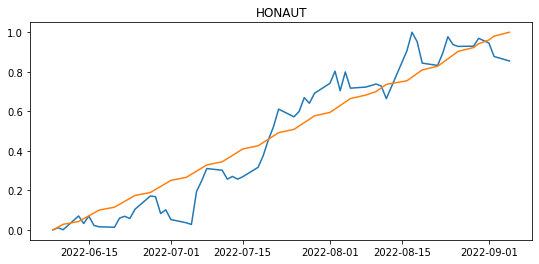

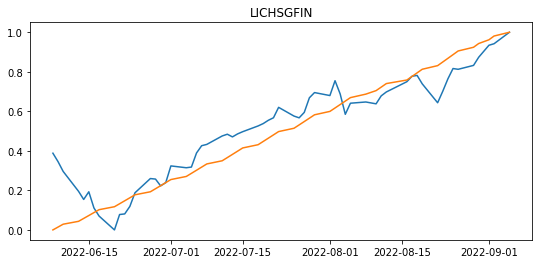

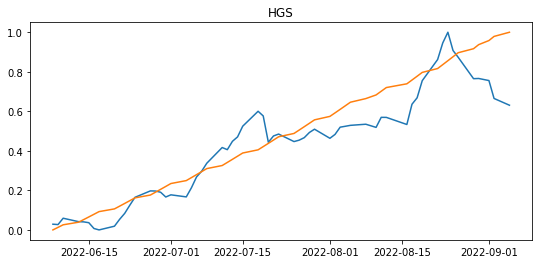

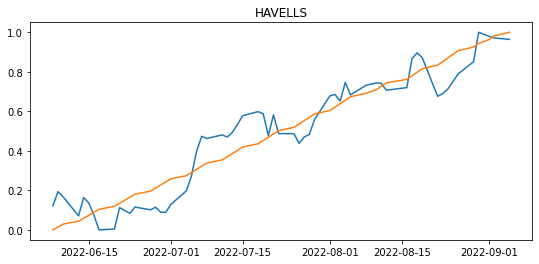

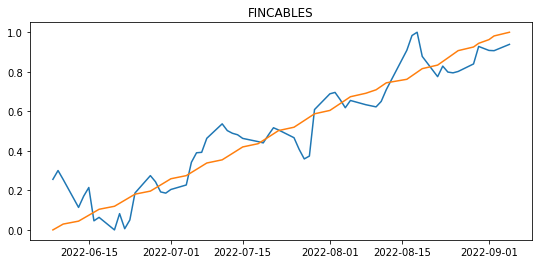

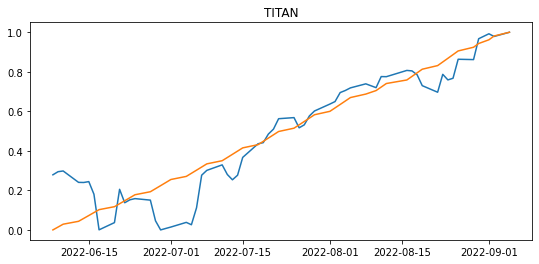

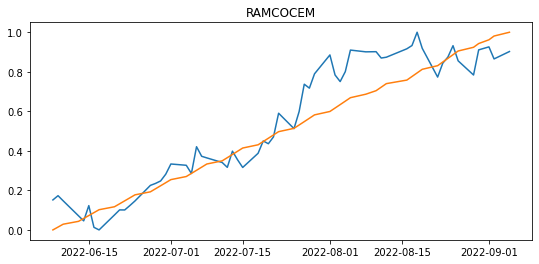

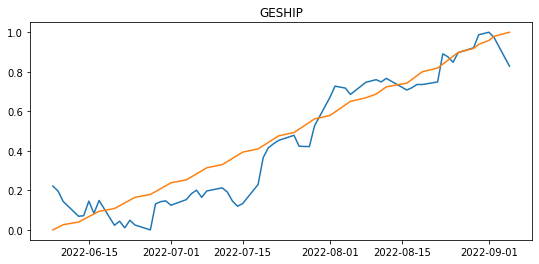

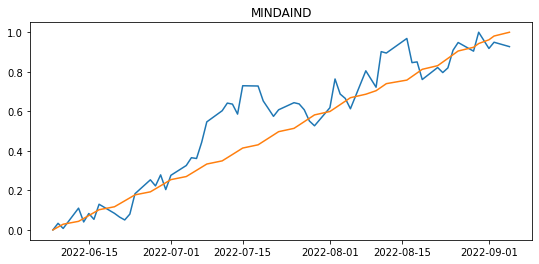

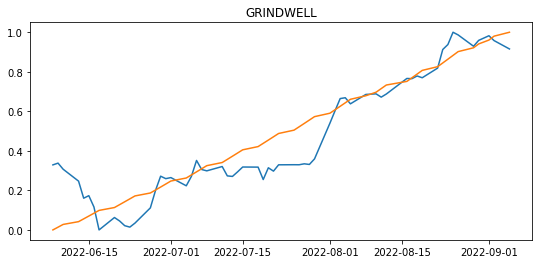

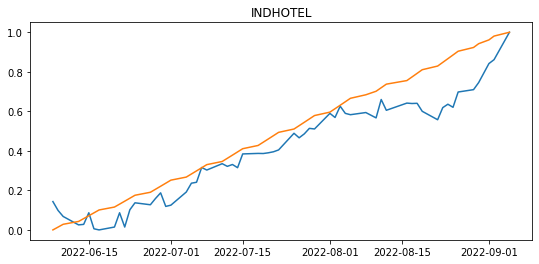

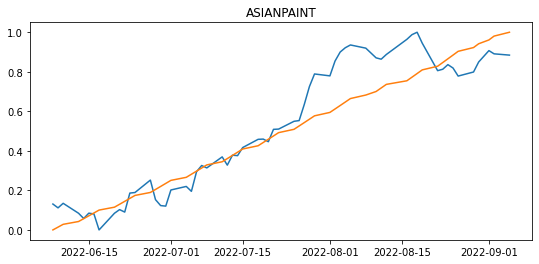

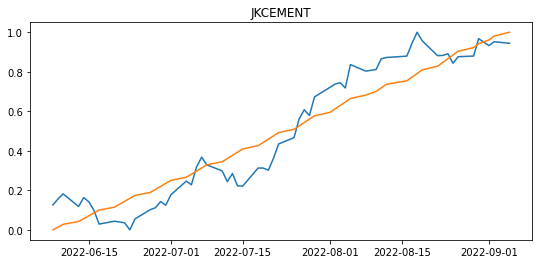

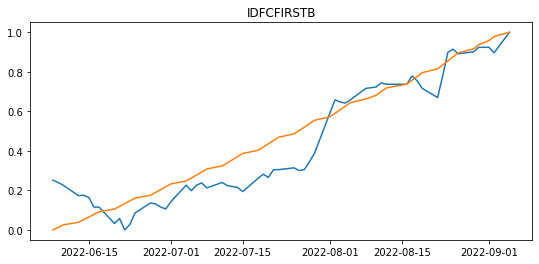

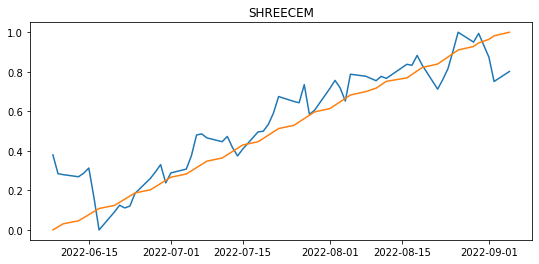

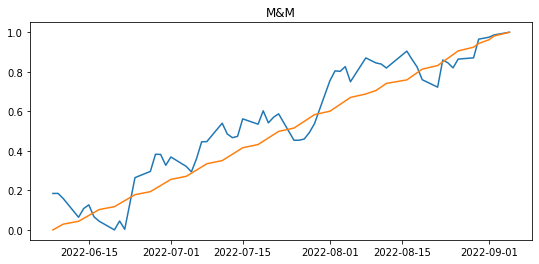

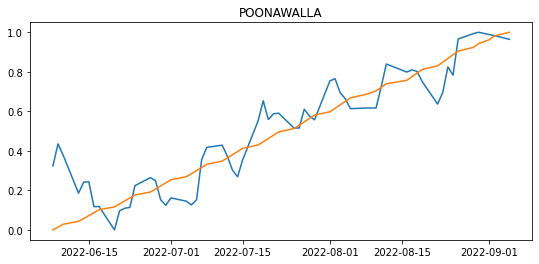

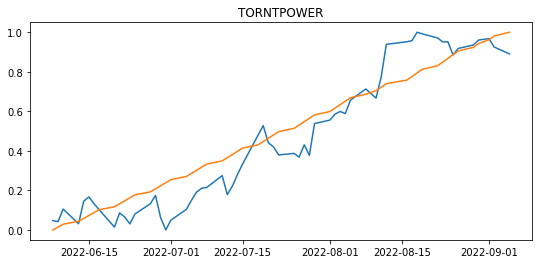

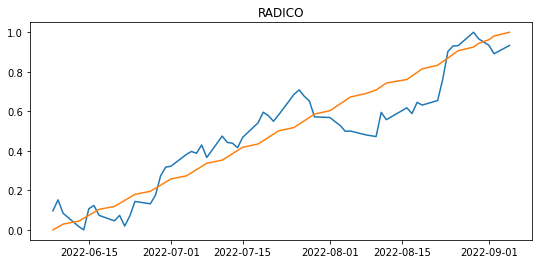

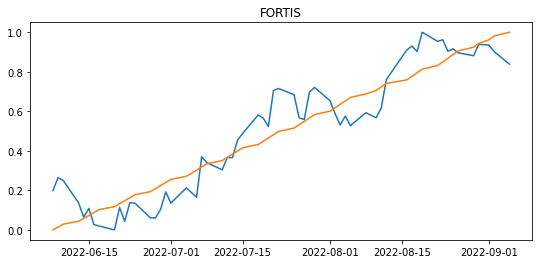

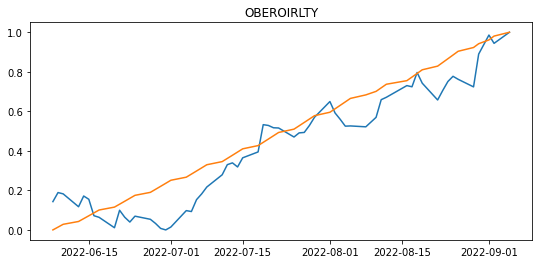

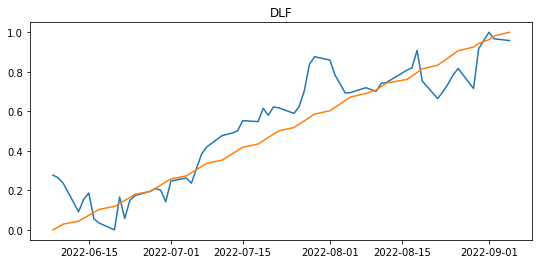

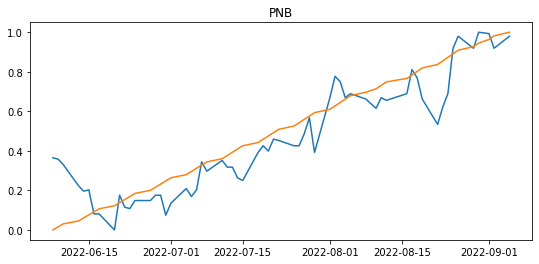

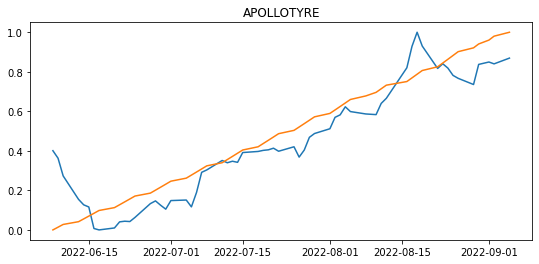

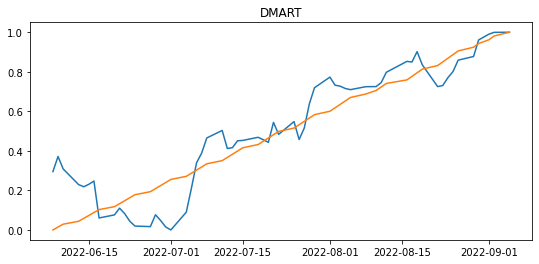

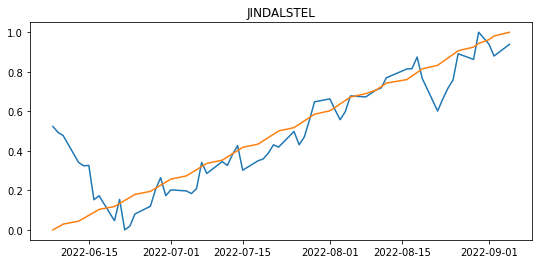

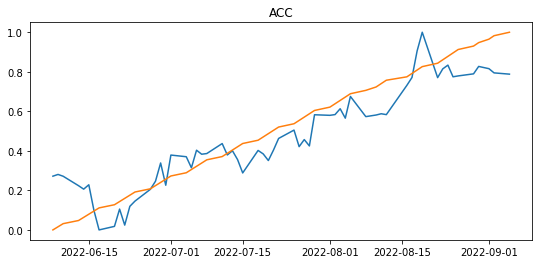

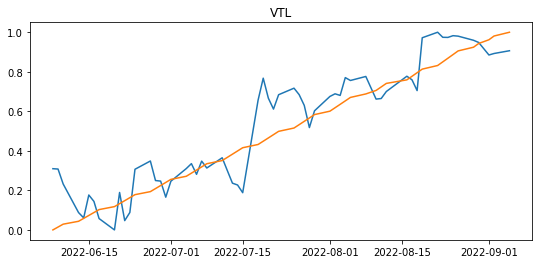

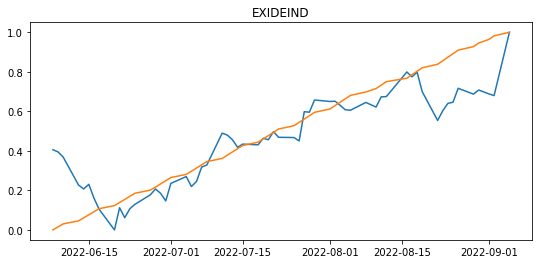

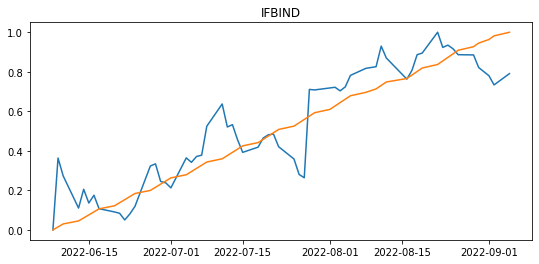

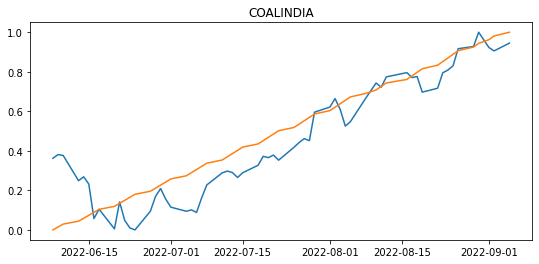

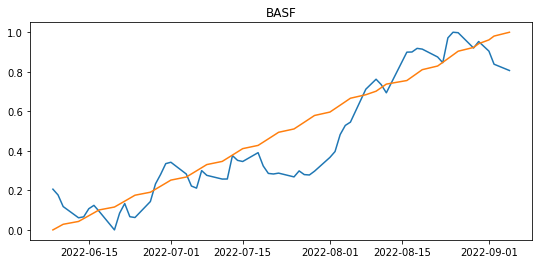

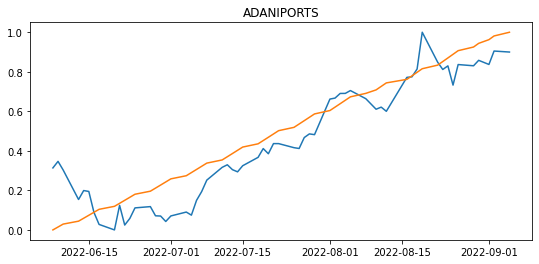

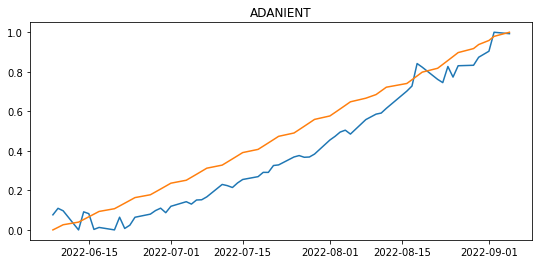

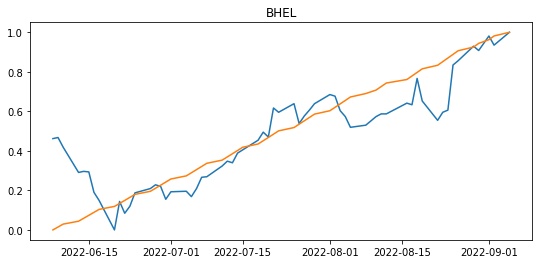

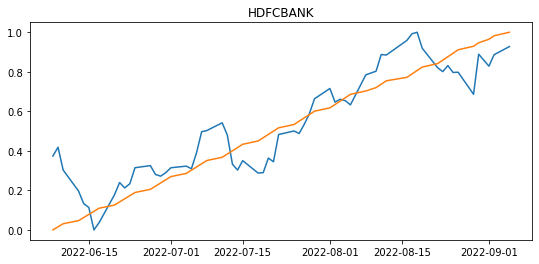

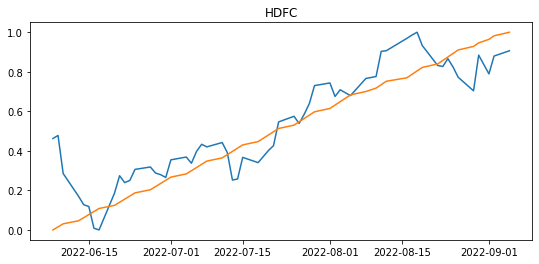

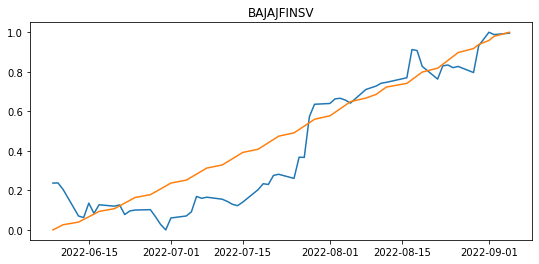

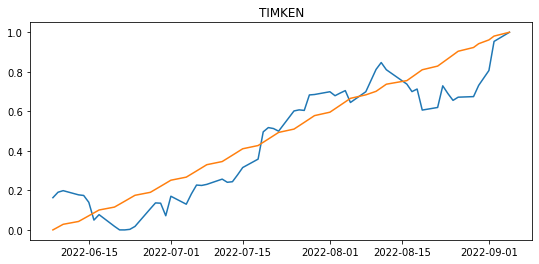

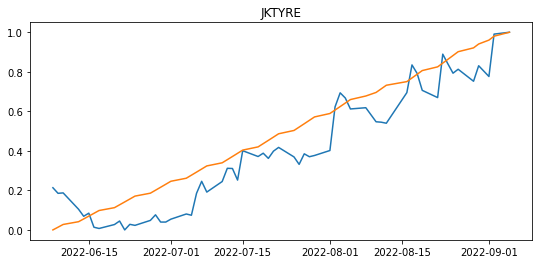

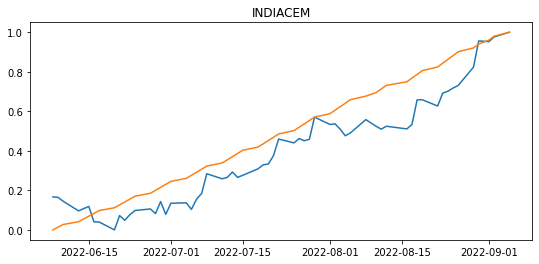

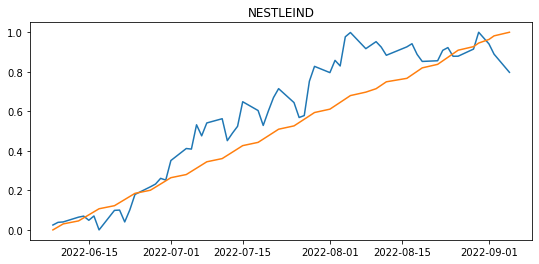

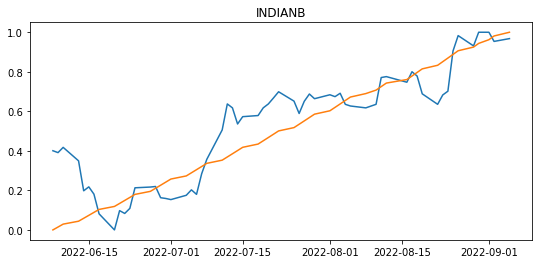

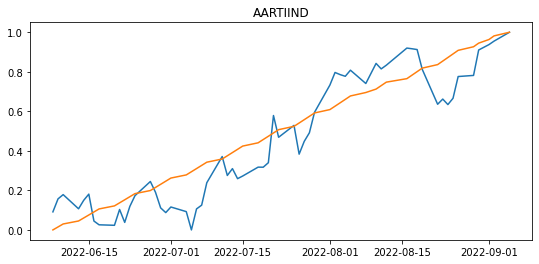

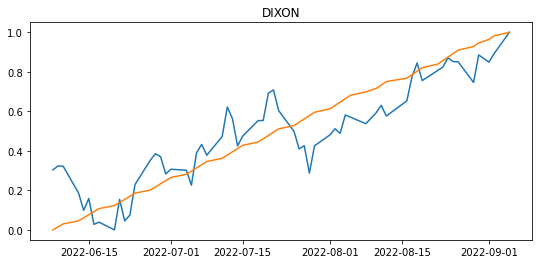

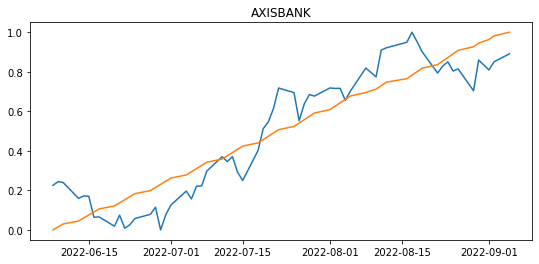

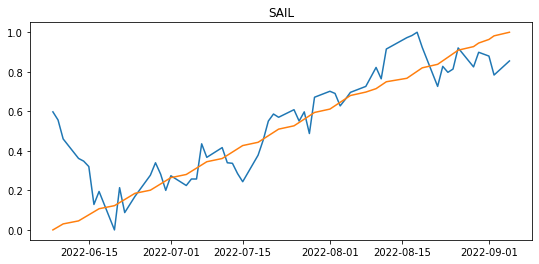

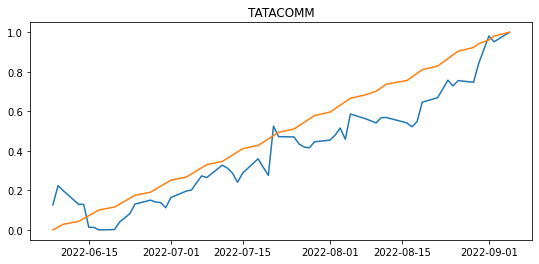

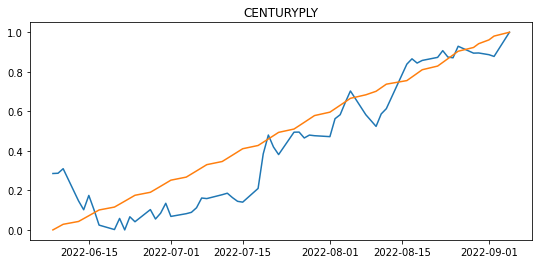

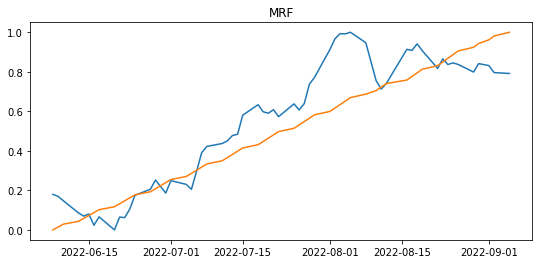

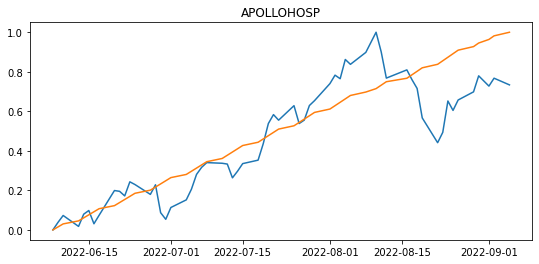

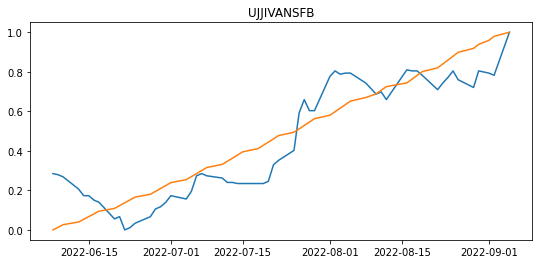

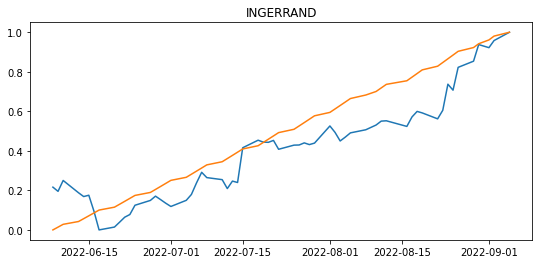

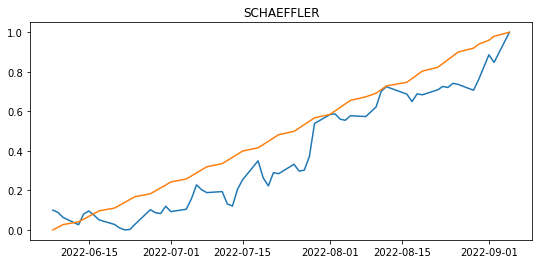

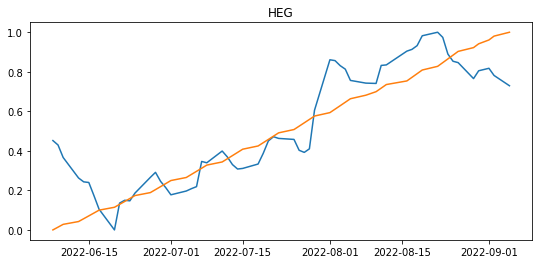

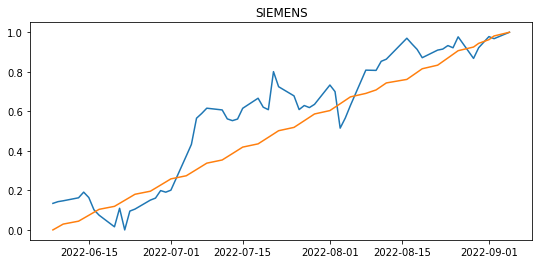

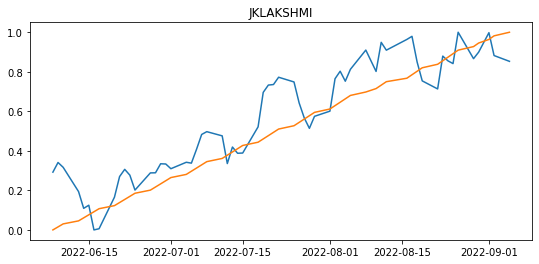

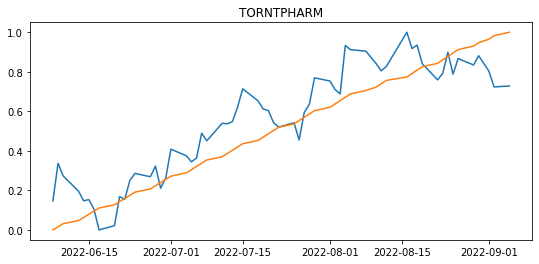

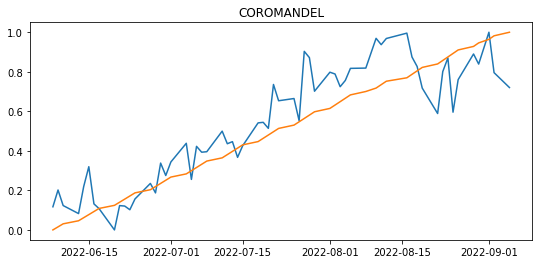

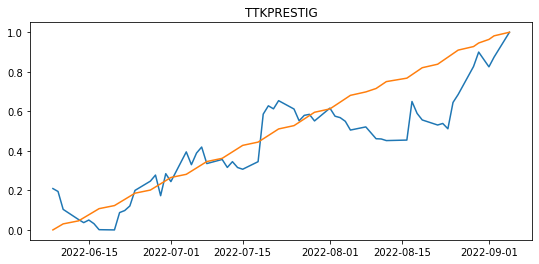

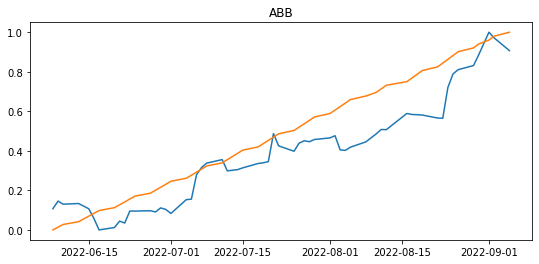

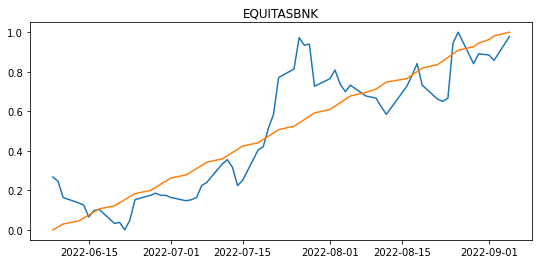

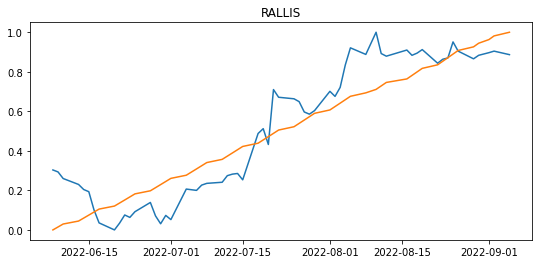

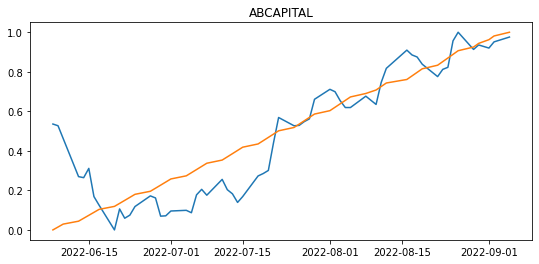

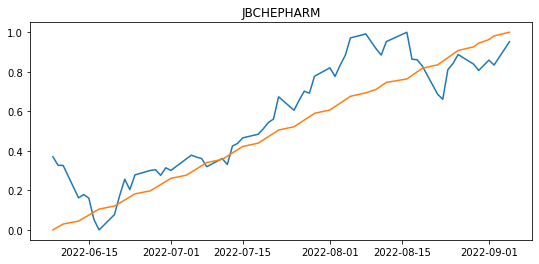

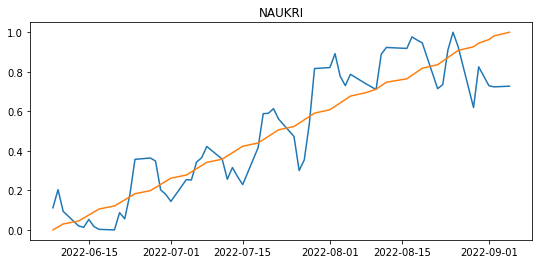

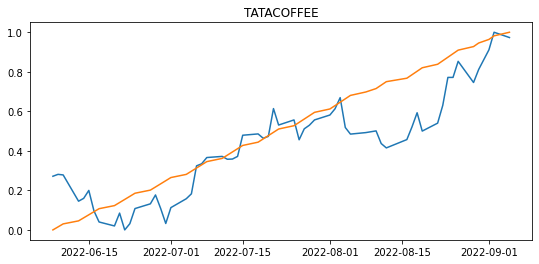

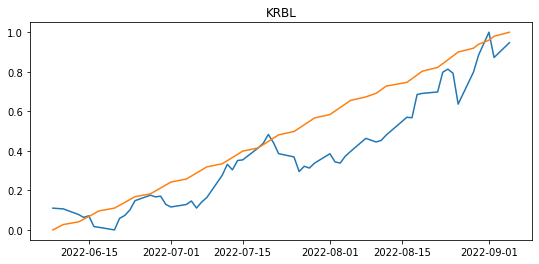

In [ ]:
# top10 = df.sort_values(by=[0]).head(10)
top10  = df[df[0] < 7].sort_values(by=[0])  
# ideally it should 6
topnames = top10['index'].values
print("topnames",topnames)
# topnames=['VBL','ATGL']
for name in topnames: 
    try:
          
        ohlcv = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
        ohlcv['minmax']=min_max(ohlcv['Close'].values)
        
        ohlcv['expected'] =  graphfit(ohlcv)

        ohlcv['result'] = ohlcv.apply(lambda x: (x['minmax'] - x['expected'] ) , axis=1)
        
        print(name) 
        colname = 'Close'
        plotgraph(ohlcv, name)
        colname = 'expected'
        # plotgraph(ohlcv, colname)
        
        
    
    except Exception as ex:
        print(ex)#raised if  is empty.
        print("ERROR: ", name)
   
        traceback.print_exc()

🤑 **Result**


In [ ]:
print(topnames)
x, y =returnpercent(topnames, daterange)
print("RESULT : ",x)

['ABB' 'ACC' 'AIAENG' 'AARTIIND' 'ADANIENT' 'ADANIGREEN' 'ADANIPORTS'
 'ATGL' 'ADANITRANS' 'ABCAPITAL' 'ABFRL' 'APOLLOHOSP' 'APOLLOTYRE'
 'ASIANPAINT' 'DMART' 'AXISBANK' 'BASF' 'BAJAJFINSV' 'BANKBARODA' 'BHEL'
 'CCL' 'CENTURYPLY' 'CUB' 'COALINDIA' 'COROMANDEL' 'DLF' 'DIXON'
 'EICHERMOT' 'EQUITASBNK' 'EXIDEIND' 'FEDERALBNK' 'FINCABLES' 'FORTIS'
 'GALAXYSURF' 'GRASIM' 'GESHIP' 'GRINDWELL' 'HEG' 'HDFCBANK' 'HAVELLS'
 'HGS' 'HONAUT' 'HDFC' 'ICICIBANK' 'IDFCFIRSTB' 'IDFC' 'IFBIND' 'ITC'
 'INDIACEM' 'INDIANB' 'INDHOTEL' 'NAUKRI' 'INGERRAND' 'JBCHEPHARM'
 'JKCEMENT' 'JKLAKSHMI' 'JKTYRE' 'JINDALSTEL' 'JYOTHYLAB' 'KRBL'
 'LICHSGFIN' 'LAOPALA' 'LAXMIMACH' 'LT' 'MRF' 'M&M' 'MINDAIND' 'NESTLEIND'
 'OBEROIRLTY' 'PIIND' 'PAGEIND' 'PHOENIXLTD' 'PIDILITIND' 'POONAWALLA'
 'PRSMJOHNSN' 'PNB' 'RECLTD' 'RADICO' 'RALLIS' 'RBA' 'SKFINDIA'
 'SCHAEFFLER' 'SHREECEM' 'SIEMENS' 'SAIL' 'TTKPRESTIG' 'TVSMOTOR'
 'TATACOFFEE' 'TATACOMM' 'RAMCOCEM' 'TIMKEN' 'TITAN' 'TORNTPHARM'
 'TORNTPOWER' 'TRENT' 'UJJIVAN' 'UJJIVA

In [ ]:
x, y = returnpercent_v2(topnames, 52 , daterange )
print("RESULT : ",x)

['ABB' 'ACC' 'AIAENG' 'AARTIIND' 'ADANIENT' 'ADANIGREEN' 'ADANIPORTS'
 'ATGL' 'ADANITRANS' 'ABCAPITAL' 'ABFRL' 'APOLLOHOSP' 'APOLLOTYRE'
 'ASIANPAINT' 'DMART' 'AXISBANK' 'BASF' 'BAJAJFINSV' 'BANKBARODA' 'BHEL'
 'CCL' 'CENTURYPLY' 'CUB' 'COALINDIA' 'COROMANDEL' 'DLF' 'DIXON'
 'EICHERMOT' 'EQUITASBNK' 'EXIDEIND' 'FEDERALBNK' 'FINCABLES' 'FORTIS'
 'GALAXYSURF' 'GRASIM' 'GESHIP' 'GRINDWELL' 'HEG' 'HDFCBANK' 'HAVELLS'
 'HGS' 'HONAUT' 'HDFC' 'ICICIBANK' 'IDFCFIRSTB' 'IDFC' 'IFBIND' 'ITC'
 'INDIACEM' 'INDIANB' 'INDHOTEL' 'NAUKRI' 'INGERRAND' 'JBCHEPHARM'
 'JKCEMENT' 'JKLAKSHMI' 'JKTYRE' 'JINDALSTEL' 'JYOTHYLAB' 'KRBL'
 'LICHSGFIN' 'LAOPALA' 'LAXMIMACH' 'LT' 'MRF' 'M&M' 'MINDAIND' 'NESTLEIND'
 'OBEROIRLTY' 'PIIND' 'PAGEIND' 'PHOENIXLTD' 'PIDILITIND' 'POONAWALLA'
 'PRSMJOHNSN' 'PNB' 'RECLTD' 'RADICO' 'RALLIS' 'RBA' 'SKFINDIA'
 'SCHAEFFLER' 'SHREECEM' 'SIEMENS' 'SAIL' 'TTKPRESTIG' 'TVSMOTOR'
 'TATACOFFEE' 'TATACOMM' 'RAMCOCEM' 'TIMKEN' 'TITAN' 'TORNTPHARM'
 'TORNTPOWER' 'TRENT' 'UJJIVAN' 'UJJIVA

In [ ]:
ohlcv

,Open,High,Low,Close,Adj Close,Volume,minmax,expected,result
Date,,,,,,,,,
2022-06-08,472.799988,474.600006,461.149994,465.899994,465.899994,32765,0.054151,0.000000,0.054151
2022-06-09,461.850006,467.000000,461.850006,466.000000,466.000000,10572,0.054662,0.013691,0.040970
2022-06-10,462.000000,470.200012,460.049988,464.299988,464.299988,60182,0.045977,0.027471,0.018506
2022-06-13,459.899994,474.049988,459.100006,464.350006,464.350006,95311,0.046233,0.041341,0.004892
2022-06-14,467.000000,497.000000,467.000000,471.750000,471.750000,192883,0.084036,0.055300,0.028736
...,...,...,...,...,...,...,...,...,...
2022-08-29,633.500000,647.299988,623.049988,642.049988,642.049988,633377,0.954023,0.920622,0.033401
2022-08-30,645.000000,658.000000,640.500000,647.349976,647.349976,173031,0.981098,0.940275,0.040823
2022-09-01,654.000000,678.000000,645.650024,651.049988,651.049988,247226,1.000000,0.960055,0.039945
